# attribute availability

{
    "ablöse": null,
    "address": "1020 wien, 02. bezirk, leopoldstadt",
    "ausbaustufe": null,
    "balkon": null,
    "bautyp": "altbau",
    "betriebskosten (exkl. mwst)": null,
    "betriebskosten (inkl. mwst)": null,
    "böden": "parkett",
    "company_address": "naschmarkt 501040 wien, 04. bezirk, wieden",
    "company_broker_name": "david plishtiev",
    "company_name": "adamant immobilien gmbh",
    "company_reference_id": "8422/1068",
    "company_url": null,
    "dachterrasse": null,
    "description_additional": "stockwerk: eganzahl badezimmer: 4energiepass gültig bis: 2028-07-13energiepass hwb: 47 kwh/m²/jahranzahl wc: 5",
    "description_equipment": "bad mit duscheeinbaukücheboden: fliesenbodenboden: parkettbodenheizung: fussbodenheizungheizungsart: luftwärmepumpe",
    "description_general": "\"aparthotel\" mit 6 zimmer und 1 büro voll ausgestattet nähe 1 bezirk. zum verkauf steht ein exklusives wohnungspaket in einem prachtvollen altbau am malerischen czerninplatz

'\n{\n    "ablöse": null,\n    "address": "1050 wien, 05. bezirk, margareten, stolberggasse", -> district\n    "ausbaustufe": null,\n    "balkon": null,\n    "bautyp": "neubau",\n    "betriebskosten (exkl. mwst)": null,\n    "betriebskosten (inkl. mwst)": null,\n    "böden": null,\n    "company_address": "döblinger hauptstraße 32/gl21190 wien, 19. bezirk, döbling",\n    "company_broker_name": "peter führer",\n    "company_name": "pecosa property gmbh",\n    "company_reference_id": "619",\n    "company_url": "http://www.pecosa.at",\n    "dachterrasse": null,\n    "description_additional": "stockwerk: 7. etage / 7 etage & dgstiege: 1anzahl badezimmer: 2energiepass hwb: 32 kwh/m²/jahrverfügbar ab: sofortbaujahr: 2015anzahl wc: 2",\n    "description_equipment": "terrassenanzahl:4terrassenfläche: 21 m²barrierefrei",\n    "description_general": "dg-wohnung mit dachterrasse und innenstadtblickdie wohnung bietet einen atemberaubenden blick über die dächer wiens, vom neuen dc tower über den ste

# sketch schema

/var/folders/p6/sy85mkz13lsffnvz7237y4340000gn/T/ipykernel_6196/2811458516.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


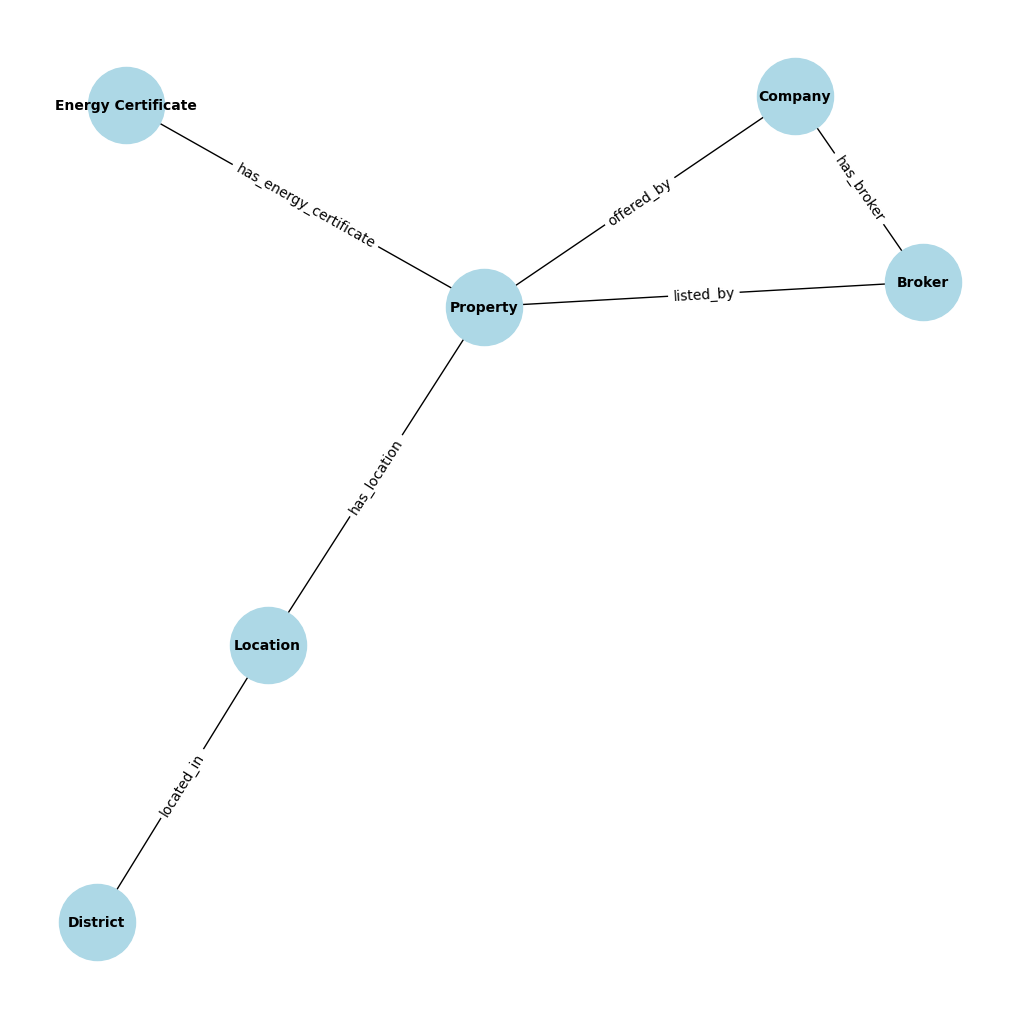

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
plt.figure(figsize=(10, 10))

G.add_node("Property")
G.add_node("Location")
G.add_node("Company")
G.add_node("Energy Certificate")
G.add_node("Broker")

G.add_edge("Property", "Location", label="has_location")
G.add_edge("Property", "Company", label="offered_by")
G.add_edge("Property", "Energy Certificate", label="has_energy_certificate")
G.add_edge("Property", "Broker", label="listed_by")
G.add_edge("Location", "District", label="located_in")
G.add_edge("Company", "Broker", label="has_broker")

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=3000, font_size=10, font_weight="bold")
edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.axis("off")
plt.tight_layout()
plt.show()